# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

## 1. Load in the dataset

This is the only part completed for you.

---

In [1047]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

sns.set_style('white')

%matplotlib inline

In [1048]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [1049]:
su.head(2)

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1


In [1050]:
"""Global replacement ? to 0 """
columns = su.columns
for col in columns:
    try:
        su[col] = su[col].map(lambda x:x.replace('?','0'))
    except:
        pass

In [1051]:
""" From Object to numeric """
su['alchemy_category_score'] = su['alchemy_category_score'].convert_objects(convert_numeric=True)
su['news_front_page'] = su['news_front_page'].convert_objects(convert_numeric=True)
su['is_news'] = su['is_news'].convert_objects(convert_numeric=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [1052]:
""" Making 0 categories pass to unknown"""
su['alchemy_category'] = su['alchemy_category'].map(lambda x:x.replace('0','unknown'))

In [1053]:
# """Pass possible numerical values datatype"""
# for i, col in enumerate(columns):
#     try:
#         su[i] = su[i].map(lambda x:pd.to_numeric(x, errors='coerce'))
#     except:
#         pass

In [1054]:
""" Dropping vars"""
## framebased all values are 0
su = su.drop(['framebased'], axis=1)
# url','urlid', 

In [1055]:
## -1 values on image ratio and embeded ratio
neg_values = ['embed_ratio', 'image_ratio']
for i in neg_values:
    su[i] = [t if t>=0 else 0 for t in su[i]]

In [1056]:
neg_values = su[['embed_ratio', 'image_ratio']]
neg_values.describe()

,embed_ratio,image_ratio
count,7395.000000,7395.000000
mean,0.000915,0.369015
std,0.007429,1.878911
min,0.000000,0.000000
25%,0.000000,0.025900
50%,0.000000,0.083051
75%,0.000000,0.236700
max,0.250000,113.333333


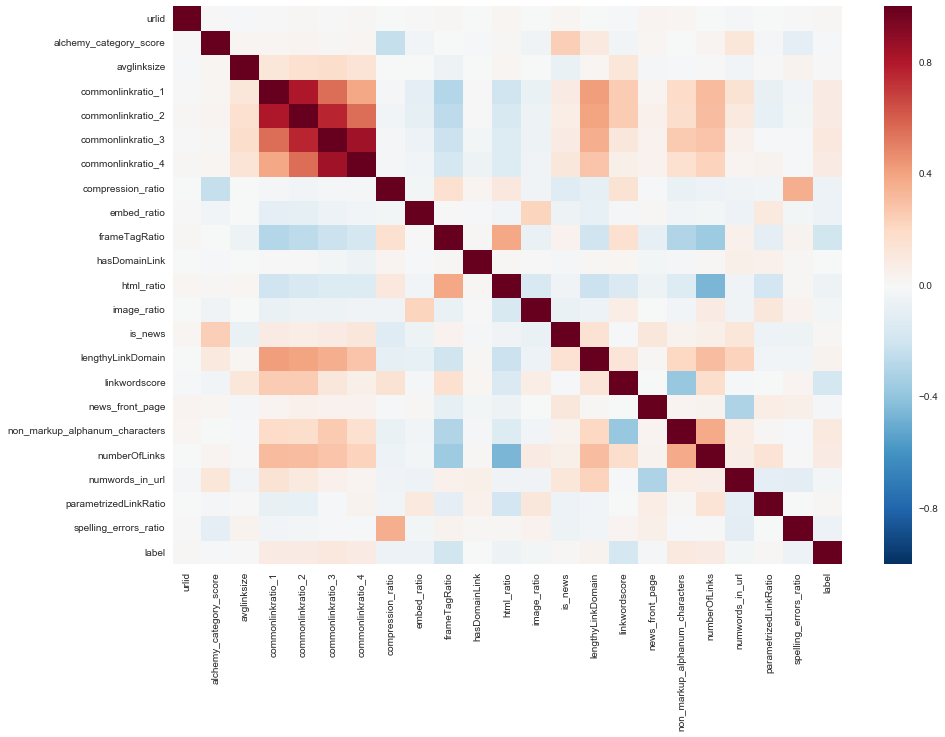

In [1057]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(su.corr())


## 3. Use statsmodels' logistic regression function to look at variable significance

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [1058]:
import statsmodels.formula.api as smf

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [1059]:
formula1 = '''
label ~ 
alchemy_category_score,
avglinksize,
embed_ratio,
frameTagRatio,
hasDomainLink,
html_ratio,
image_ratio,
lengthyLinkDomain,
linkwordscore,
news_front_page,
numberOfLinks,
numwords_in_url,
parametrizedLinkRatio,
spelling_errors_ratio,
is_news,
-1
'''


formula1 = formula1.replace(",", "+")

# logit function
logreg = smf.logit(formula1, data=su)
logreg_results = logreg.fit()
print logreg_results.summary()


Optimization terminated successfully.
         Current function value: 0.655944
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7379
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 May 2016   Pseudo R-squ.:                 0.05319
Time:                        21:37:37   Log-Likelihood:                -4850.7
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                1.677e-106
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  1.1925      0.177      6.754      0.000         0.846    

In [1060]:
formula2 = '''
label ~ 
alchemy_category_score,
avglinksize,
embed_ratio,
frameTagRatio,
hasDomainLink,
html_ratio,
image_ratio,
lengthyLinkDomain,
news_front_page,
numberOfLinks,
numwords_in_url,
parametrizedLinkRatio,
spelling_errors_ratio,
C(alchemy_category),
C(is_news)
-1
'''

formula2 = formula2.replace(",", "+")

# logit function
logreg = smf.logit(formula2, data=su)
logreg_results = logreg.fit()
print logreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.628819
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7368
Method:                           MLE   Df Model:                           26
Date:                Tue, 17 May 2016   Pseudo R-squ.:                 0.09234
Time:                        21:37:40   Log-Likelihood:                -4650.1
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                9.419e-183
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
C(alchemy_category)[arts_entertainment]     0.067

In [1061]:
su.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,7395.0,5305.704665,3048.384114,1.000000,2688.500000,5304.000000,7946.500000,10566.000000
alchemy_category_score,7395.0,0.412258,0.331274,0.000000,0.000000,0.471444,0.708279,0.999426
avglinksize,7395.0,2.761823,8.619793,0.000000,1.602062,2.088235,2.627451,363.000000
commonlinkratio_1,7395.0,0.468230,0.203133,0.000000,0.340370,0.481481,0.616604,1.000000
commonlinkratio_2,7395.0,0.214080,0.146743,0.000000,0.105263,0.202454,0.300000,1.000000
commonlinkratio_3,7395.0,0.092062,0.095978,0.000000,0.022222,0.068627,0.133333,0.980392
commonlinkratio_4,7395.0,0.049262,0.072629,0.000000,0.000000,0.022222,0.065065,0.980392
compression_ratio,7395.0,2.255103,5.704313,0.000000,0.442616,0.483680,0.578227,21.000000
embed_ratio,7395.0,0.000915,0.007429,0.000000,0.000000,0.000000,0.000000,0.250000
frameTagRatio,7395.0,0.056423,0.041446,0.000000,0.028502,0.045775,0.073459,0.444444


## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

### Cross validation

In [1062]:
## Standarizing the dataset
nc = [x for x in su if x not in ['url','urlid', 'boilerplate', 'alchemy_category', 'label', 'is_news', 
                                'hasDomainLink', 'lengthyLinkDomain', 'news_front_page']]
su.ix[:, nc] = (su.ix[:, nc] - su.ix[:, nc].mean()) / su.ix[:, nc].std() 

In [1063]:
sub_list = su[[
'label', 
'alchemy_category_score',
'avglinksize',
'embed_ratio',
'frameTagRatio',
'hasDomainLink',
'html_ratio',
'image_ratio',
'lengthyLinkDomain',
'news_front_page',
'numberOfLinks',
'numwords_in_url',
'parametrizedLinkRatio',
'spelling_errors_ratio',
'is_news']]


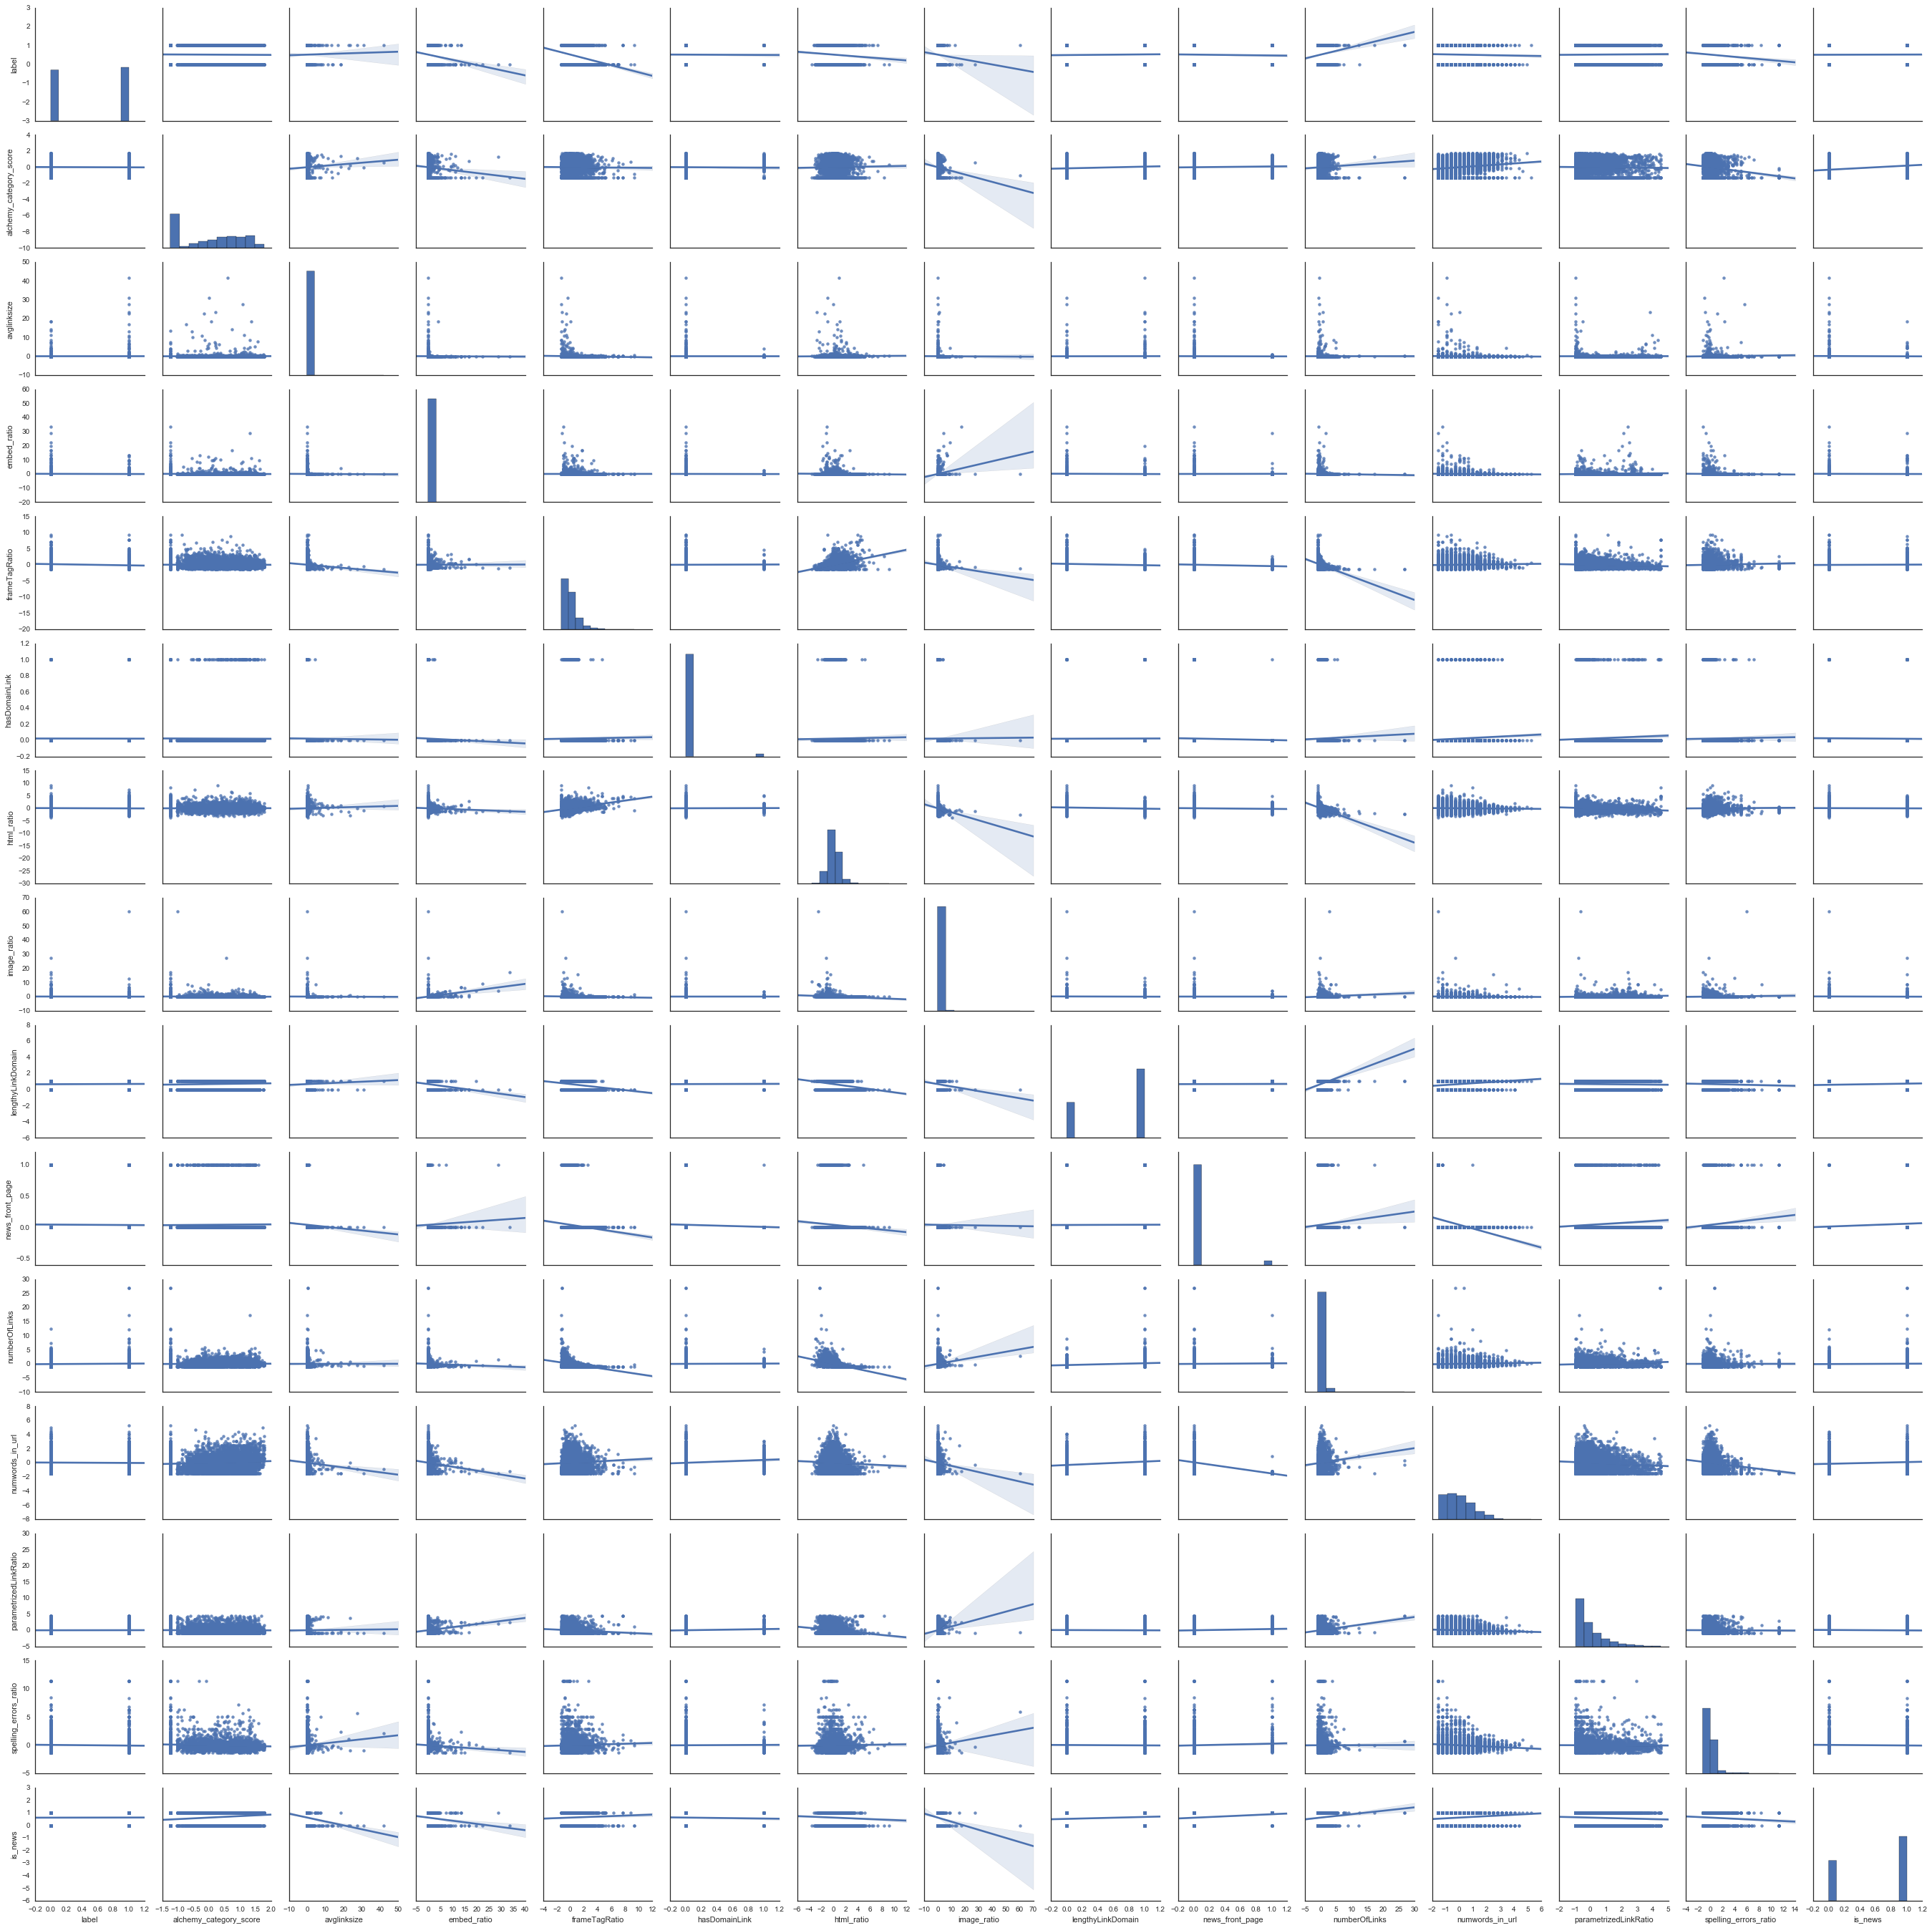

In [626]:
# sns.pairplot(sub_list, kind="reg")

In [1064]:
su.describe().T

,count,mean,std,min,25%,50%,75%,max
urlid,7395.0,5.305705e+03,3048.384114,1.000000,2688.500000,5304.000000,7946.500000,10566.000000
alchemy_category_score,7395.0,1.920873e-15,1.000000,-1.244463,-1.244463,0.178662,0.893583,1.772454
avglinksize,7395.0,1.259067e-15,1.000000,-0.320405,-0.134546,-0.078144,-0.015589,41.791977
commonlinkratio_1,7395.0,4.503459e-15,1.000000,-2.305040,-0.629442,0.065233,0.730424,2.617834
commonlinkratio_2,7395.0,-6.260307e-15,1.000000,-1.458879,-0.741548,-0.079227,0.585515,5.355767
commonlinkratio_3,7395.0,-2.861358e-16,1.000000,-0.959201,-0.727667,-0.244169,0.430004,9.255536
commonlinkratio_4,7395.0,1.110914e-15,1.000000,-0.678274,-0.678274,-0.372304,0.217580,12.820407
compression_ratio,7395.0,-3.957468e-16,1.000000,-0.395333,-0.317740,-0.310541,-0.293966,3.286092
embed_ratio,7395.0,-3.773107e-16,1.000000,-0.123154,-0.123154,-0.123154,-0.123154,33.529674
frameTagRatio,7395.0,2.165273e-15,1.000000,-1.361367,-0.673669,-0.256917,0.411039,9.362184


In [1065]:
import patsy

formula3 = '''
label ~ 
alchemy_category_score,
avglinksize,
embed_ratio,
frameTagRatio,
hasDomainLink,
html_ratio,
image_ratio,
lengthyLinkDomain,
news_front_page,
numberOfLinks,
numwords_in_url,
parametrizedLinkRatio,
spelling_errors_ratio,
C(alchemy_category),
C(is_news)
-1
'''

formula3 = formula3.replace(",", "+")
y_mat, x_mat = patsy.dmatrices(formula3, data=su)
y_mat = np.array(y_mat.ravel()) ## target always an array, when doing dmatrices
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_mat, test_size =0.3, random_state =7)

In [1066]:
print X_test.shape, y_test.shape

(2219, 27) (2219,)


In [1067]:
# logit function
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.predict(X_test)
logreg.score(X_test, y_test)

0.64758900405588105

### Kfold validation

In [1068]:
from sklearn.cross_validation import cross_val_score, KFold

cv = KFold(len(y_test), 5, shuffle=True, random_state = 7)
scores = cross_val_score(logreg, X_test, y_test, cv=cv)
print scores, scores.mean()

[ 0.63063063  0.65315315  0.6463964   0.66441441  0.63431151] 0.645781221402


## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

In [1074]:
## Defining Parameters
from sklearn.grid_search import GridSearchCV

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],   
    "C":                   Cs,  
    # "dual":                [True, False], 
    "fit_intercept":       [False, True], 
    "class_weight":        [None, "balanced"],  
    "intercept_scaling":   [2, 1],       
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estimator = GridSearchCV(logreg, search_parameters, verbose=1)

In [1075]:
# Cs

In [1076]:
print X_train.shape, y_train.shape

(5176, 27) (5176,)


In [1077]:
estimator.fit(X_train, y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   10.2s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   14.8s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   20.2s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   26.6s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   33.8s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   42.0s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   51.4s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  2

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [1078]:
print estimator.best_score_

0.647411128284


In [1079]:
print estimator.best_params_

{'warm_start': False, 'C': 0.051114334834401656, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced'}


In [1080]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["Non_evergreen", "Evergreen"])

               precision    recall  f1-score   support

Non_evergreen       0.66      0.59      0.62      1079
    Evergreen       0.65      0.71      0.68      1140

  avg / total       0.65      0.65      0.65      2219



### Cross Validating
**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

In [1081]:
clf = estimator.best_estimator_
clf.fit(X_train, y_train)
print ('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.652


In [1082]:
est_ = estimator.estimator
est_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1083]:
## Reegression
lr_new = est_.fit(X_train, y_train).predict(X_test)
lr_new[:25]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.])

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

In [1084]:
from sklearn.cross_validation import cross_val_score, KFold

""" Defining the kNN"""
cv = KFold(len(y_test), 5, shuffle=True, random_state = 7)
scores = cross_val_score(logreg, X_test, y_test, cv=cv)

## Defining Parameters
from sklearn.grid_search import GridSearchCV

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],   
    "C":                   Cs,  
    # "dual":                [True, False], 
    "fit_intercept":       [False, True], 
    "class_weight":        [None, "balanced"], 
    "intercept_scaling":   [2, 1],        
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estimator = GridSearchCV(logreg, search_parameters, cv=cv, verbose=1)

In [1085]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 6400 candidates, totalling 32000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.7s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   10.9s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   19.5s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   24.5s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   30.4s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   36.7s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:   43.9s
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:   51.6s
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  1

GridSearchCV(cv=sklearn.cross_validation.KFold(n=2219, n_folds=5, shuffle=True, random_state=7),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [1086]:
print estimator.best_score_

0.645786390266


In [1087]:
print estimator.best_params_

{'warm_start': False, 'C': 0.062949889902218878, 'intercept_scaling': 2, 'fit_intercept': False, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': 'balanced'}


In [1088]:
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["Non_evergreen", "Evergreen"])

               precision    recall  f1-score   support

Non_evergreen       0.66      0.59      0.62      1079
    Evergreen       0.65      0.71      0.68      1140

  avg / total       0.65      0.65      0.65      2219



## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

In [1089]:
""" Recreation"""
def step_function(x):
    return 1 if x == "recreation" else 0

## Copy of alchemy cat
su['recreation'] = [x for x in su.alchemy_category.values]

## Making it binary
su['recreation'] = su.recreation.apply(step_function)

In [1090]:
## Fraction of instances
print su.recreation.value_counts()
print su.recreation.mean()
print len(su.recreation)
print su.recreation.value_counts()/len(su.recreation)

0    6166
1    1229
Name: recreation, dtype: int64
0.166193373901
7395
0    0.833807
1    0.166193
Name: recreation, dtype: float64


### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

In [ ]:
# # hasDomainLink,
# # html_ratio,
# # image_ratio,
# # lengthyLinkDomain,
# # news_front_page,
# (avglinksize + numberOfLinks)**2,
# (image_ratio + html_ratio+spelling_errors_ratio)**2
# embed_ratio,
# frameTagRatio,
# numberOfLinks,
# numwords_in_url,
# parametrizedLinkRatio,
# spelling_errors_ratio,
# C(alchemy_category),
# C(is_news),

In [1091]:
formula4 = '''
recreation ~ 
alchemy_category_score,
embed_ratio,
frameTagRatio,
numberOfLinks,
(avglinksize + numberOfLinks)**2,
(image_ratio + html_ratio + spelling_errors_ratio)**2
-1
'''

formula4 = formula4.replace(",", "+")
y_mat, x_mat = patsy.dmatrices(formula4, data=su)
x_mat.design_info.term_names

['alchemy_category_score',
 'embed_ratio',
 'frameTagRatio',
 'numberOfLinks',
 'avglinksize',
 'avglinksize:numberOfLinks',
 'image_ratio',
 'html_ratio',
 'spelling_errors_ratio',
 'image_ratio:html_ratio',
 'image_ratio:spelling_errors_ratio',
 'html_ratio:spelling_errors_ratio']

In [1092]:
y_mat = np.array(y_mat.ravel()) ## target always an array, when doing dmatrices
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_mat, test_size =0.3, random_state =7)

In [1093]:
print X_test.shape, y_test.shape

(2219, 12) (2219,)


In [1094]:
# logit function
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# logreg.predict(X_test)
logreg.score(X_test, y_test)

0.82694907616043267

### 7.3 Normalize the predictor matrix columns

---

In [677]:
## ASK??
''' Data is already standarized'''

' Data is already standarized'

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

In [1095]:
## Defining Parameters

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],  
    "C":                   Cs, 
    # "dual":                [True, False], 
    "class_weight":        [None, "balanced"], 
    "intercept_scaling":   [2, 1],       
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estimator = GridSearchCV(logreg, search_parameters, scoring ='accuracy', verbose=1)

In [1096]:
estimator.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    3.3s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    6.0s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    9.5s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   13.8s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   19.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   25.4s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   34.3s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   44.0s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   56.2s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [1097]:
print estimator.best_score_

0.836553323029


In [1098]:
print estimator.best_params_

{'warm_start': False, 'C': 0.051114334834401656, 'intercept_scaling': 2, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}


In [1106]:
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["No Recreation Cat", "Recreation Cat"])

                   precision    recall  f1-score   support

No Recreation Cat       0.83      1.00      0.91      1837
   Recreation Cat       0.00      0.00      0.00       382

      avg / total       0.69      0.83      0.75      2219



### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

In [1107]:
## WHY??
clf = estimator.best_estimator_
clf.fit(X_train, y_train)
print ('Test accuracy: %3.f' % clf.score(X_test, y_test))

Test accuracy:   1


In [ ]:
## SEE refer to week4-4.1-classification-report

In [1108]:
est_ = estimator.estimator
est_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1109]:
lr_new = est_.fit(X_train, y_train).predict(X_test)
lr_new[:25]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

In [1110]:
## Defining Parameters

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],  
    "C":                   Cs, 
    # "dual":                [True, False], 
    "class_weight":        [None, "balanced"], 
    "intercept_scaling":   [2, 1],       
    "solver":              ['liblinear'],
    "warm_start":          [False, True]
}

estimator = GridSearchCV(logreg, search_parameters, scoring ='precision',verbose=1)

In [1112]:
estimator.fit(X_train, y_train)

Fitting 3 folds for each of 3200 candidates, totalling 9600 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    6.7s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   10.8s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   15.7s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   21.6s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   38.9s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   49.8s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 9600 out of 9600 | elapsed:  2.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'warm_start': [False, True], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=1)

In [1113]:
print estimator.best_score_

0.333462132921


In [1114]:
print estimator.best_params_

{'warm_start': False, 'C': 0.051114334834401656, 'intercept_scaling': 2, 'solver': 'liblinear', 'penalty': 'l1', 'class_weight': None}


In [1115]:
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["No Recreation Cat", "Recreation Cat"])

                   precision    recall  f1-score   support

No Recreation Cat       0.83      1.00      0.91      1837
   Recreation Cat       0.00      0.00      0.00       382

      avg / total       0.69      0.83      0.75      2219



## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [1116]:
import json
from sklearn.pipeline import Pipeline
su_json = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

In [1117]:
## Colums 
su_json['title'] = su_json.boilerplate.map(lambda x:json.loads(x).get('title',''))
su_json['body']= su_json.boilerplate.map(lambda x:json.loads(x).get('body',''))

## na columns from title and body to blank strings
titles=su_json['title'].fillna('')
body=su_json['body'].fillna('')

In [1118]:
print len(titles)

7395


In [1119]:
titles[:3]

0    IBM Sees Holographic Calls Air Breathing Batte...
1    The Fully Electronic Futuristic Starting Gun T...
2    Fruits that Fight the Flu fruits that fight th...
Name: title, dtype: object

In [1120]:
print len(body)

7395


In [1121]:
body.head(3)

0    A sign stands outside the International Busine...
1    And that can be carried on a plane without the...
2    Apples The most popular source of antioxidants...
Name: body, dtype: object

In [1122]:
# target var
Y = su_json['label']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: label, dtype: int64

In [1123]:
# Percentage of classes in each type for target var
print len(Y)
Y.value_counts()/len(Y)

7395


1    0.51332
0    0.48668
Name: label, dtype: float64

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

In [1124]:
from sklearn.feature_extraction.text import CountVectorizer

## Constructing the vectorizer
title_vectorizer = CountVectorizer(max_features = 1000,
                                   ngram_range=(1, 2),
                                   stop_words='english',
                                   binary=True)

body_vectorizer = CountVectorizer(max_features = 1000,
                                  ngram_range=(1, 2),
                                  stop_words='english',
                                  binary=True)

# Vocabulary of the titles using fit
title_vectorizer.fit(titles)

# Vocabulary of the body using fit
body_vectorizer.fit(body)

# Sample title and body word matrix using transform
title_X = title_vectorizer.transform(titles)
body_X = body_vectorizer.transform(body)


### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

In [1125]:
title_model = LogisticRegression()
title_scores = cross_val_score(title_model, title_X, Y, cv=5)
## where Y is label evergreen or no evergreen
## where title_X, are the titles
print('CV scores: {}'.format(title_scores))

print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(title_scores.mean(), title_scores.std()))


CV scores: [ 0.75743243  0.75997295  0.75794456  0.74983097  0.76589986]
Average CVScore: 0.758 +/- 0.005


In [1126]:
X_train, X_test, y_train, y_test = train_test_split(title_X, Y, test_size =0.3, random_state =7)

In [1127]:
print X_train.shape, y_train.shape 
'\n'
print X_test.shape, y_test.shape

(5176, 1000) (5176,)
(2219, 1000) (2219,)


In [1128]:
## Gridsearch with cv = 5
## Defining Parameters

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],  
    "C":                   Cs,  
    "class_weight":        [None, "balanced"],     
    "solver":              ['liblinear']
}

estimator = GridSearchCV(logreg, search_parameters, cv=5, scoring ='accuracy', verbose=1)

In [1129]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   13.3s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   19.4s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   27.3s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   38.2s
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   56.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [1130]:
print estimator.best_score_

0.76313755796


In [1131]:
print estimator.best_params_

{'penalty': 'l2', 'C': 5.2919787359584364e-05, 'solver': 'liblinear', 'class_weight': 'balanced'}


In [1132]:
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["No Evergreen", "Evergreen"])

              precision    recall  f1-score   support

No Evergreen       0.73      0.80      0.76      1079
   Evergreen       0.79      0.72      0.75      1140

 avg / total       0.76      0.76      0.76      2219



### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

In [1133]:
## Gridsearch with cv = 5
## Defining Parameters

Cs = np.logspace(-5, 1, 200)

search_parameters = {
    "penalty":             ['l1','l2'],  
    "C":                   Cs,  
    "class_weight":        [None, "balanced"],     
    "solver":              ['liblinear']
}


estimator = GridSearchCV(logreg, search_parameters, cv=5, scoring='precision', verbose=1)

In [1134]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    8.8s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   14.8s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   22.7s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   32.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   44.4s
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.07189e-05, ...,   9.32930e+00,   1.00000e+01]), 'solver': ['liblinear'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=1)

In [1136]:
est_ = estimator.estimator
est_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1135]:
print estimator.best_score_

0.945112656505


In [1137]:
print estimator.best_params_

{'penalty': 'l1', 'C': 0.0073168071434271918, 'solver': 'liblinear', 'class_weight': None}


In [1138]:
y_true, y_pred = y_test, estimator.predict(X_test)
print classification_report(y_true, y_pred, target_names=["No Evergreen", "Evergreen"])

              precision    recall  f1-score   support

No Evergreen       0.52      0.99      0.69      1079
   Evergreen       0.95      0.15      0.26      1140

 avg / total       0.74      0.56      0.47      2219



### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---

In [1139]:
## WHY???
new_estimator = estimator.best_estimator_
#new_estimator.fit(X_train, y_train)
print ('Test precision: %3.f' % new_estimator.score(X_test, y_test))

Test precision:   1


In [1140]:
ranks = pd.DataFrame({'coefs':np.abs(new_estimator.coef_[0]),
                      'features':title_vectorizer.get_feature_names()})
ranks.sort_values(['coefs'], ascending=False)
ranks[:15]

,coefs,features
0,0.0,000
1,0.0,10
2,0.0,10 best
3,0.0,10 things
4,0.0,10 ways
5,0.0,100
6,0.0,101
7,0.0,101 cookbooks
8,0.0,11
9,0.0,12


In [1141]:
lr_new = est_.fit(X_train, y_train).predict(X_test)
lr_new[:25]

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1])